## Market Basket Analysis - using Association Rule Mining 

Association Rule mining is a technique of data mining used to find association between different items in a set, find frequent patterns in a transaction database, relational databases or any other information repository. We can see the association mining rules used in different fields such as Marketing, Market Basket Analysis, Clustering and Classification. 

Association rule = IF THIS  (Antecedent)
                - THEN THAT (Consequent)

Market Basket Analysis - Will use association mining rules on a given transaction to find out what are the items that customers buy more frequent, also what are the products that normally are bought together in the same transaction. 

Market Basket Analysis can be very helpful for businesses to get some insights about their customer behaviours, improve market strategies and product inventory, understand their key sales products, customize advertiments' email and changing store's layout according to some trends. 
(“R Market Basket Analysis Using Apriori Examples”). 


### Support
Support - Fraction of transactions that contain the item-set 'X'. Putting simply it is the P(AUB) is the probability of A and B occurring together. P denotes probability

Support(X)=\frac{frequency(X)}{N}

For a Rule A=>B, Support is given by:

Support(A=>B)=\frac{frequency(A,B)}{N} - Number of transactions contained the itemset, divided by the total number of transactions.

### Confidence
Confidence - Probability that item B is bought due to the purchase of item A.

For a rule A=>B Confidence shows the percentage in which B is bought with A.

Confidence(A=>B)=\frac{P(A\cap B)}{P(A)}=\frac{frequency(A,B)}{frequency(A)} - Number of transactions with both A and B divided by the total number of transactions having A.

Because Support and Confidence are probabilities, they will range from [0,1]

In [4]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [6]:
!pip install mlxtend

In [8]:
from mlxtend.frequent_patterns import apriori, association_rules
import csv

### Loading the data

In [11]:
grocery_items = set()
with open("grocery_dataset.txt") as f:
    reader = csv.reader(f, delimiter=",")
    for i, line in enumerate(reader):
        grocery_items.update(line)

output_list = list()
with open("grocery_dataset.txt") as f:
    reader = csv.reader(f, delimiter=",")
    for i, line in enumerate(reader):
        row_val = {item:0 for item in grocery_items}
        row_val.update({item:1 for item in line})
        output_list.append(row_val)
grocery = pd.DataFrame(output_list)

grocery.head()

,newspapers,sugar,frozen vegetables,mayonnaise,whisky,flower (seeds),meat spreads,frozen fruits,bottled water,turkey,...,rubbing alcohol,chocolate marshmallow,soap,baby cosmetics,organic sausage,meat,tidbits,berries,pet care,snack products
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
grocery.shape

(9835, 169)

In [15]:
grocery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9835 entries, 0 to 9834
Columns: 169 entries, newspapers to snack products
dtypes: int64(169)
memory usage: 12.7 MB


In [19]:
grocery.columns = grocery.columns.str.replace(',', '_')

In [21]:
grocery.columns.tolist()

['newspapers',
 'sugar',
 'frozen vegetables',
 'mayonnaise',
 'whisky',
 'flower (seeds)',
 'meat spreads',
 'frozen fruits',
 'bottled water',
 'turkey',
 'salt',
 'salty snack',
 'sauces',
 'soda',
 'cleaner',
 'cake bar',
 'white bread',
 'coffee',
 'female sanitary products',
 'Instant food products',
 'fruit/vegetable juice',
 'cookware',
 'make up remover',
 'cream',
 'bottled beer',
 'bathroom cleaner',
 'UHT-milk',
 'bags',
 'candy',
 'frozen chicken',
 'seasonal products',
 'misc. beverages',
 'liqueur',
 'canned fish',
 'flower soil/fertilizer',
 'brown bread',
 'pastry',
 'baking powder',
 'specialty chocolate',
 'candles',
 'soft cheese',
 'oil',
 'photo/film',
 'shopping bags',
 'liver loaf',
 'honey',
 'sliced cheese',
 'sound storage medium',
 'rolls/buns',
 'rum',
 'specialty bar',
 'cooking chocolate',
 'frozen meals',
 'soups',
 'other vegetables',
 'abrasive cleaner',
 'tropical fruit',
 'cereals',
 'liquor',
 'grapes',
 'curd',
 'sausage',
 'house keeping products'

### Visualize top sold items

In [24]:
total_item_count = sum(grocery.sum())
print("Total Item : ", total_item_count)
print()
item_summary = grocery.sum().sort_values(ascending = False).reset_index()
item_summary.rename(columns={item_summary.columns[0]:'item_name',item_summary.columns[1]:'item_count'}, inplace=True)
print("Item Summary:")
print(item_summary.head())

Total Item :  43367

Item Summary:
          item_name  item_count
0        whole milk        2513
1  other vegetables        1903
2        rolls/buns        1809
3              soda        1715
4            yogurt        1372


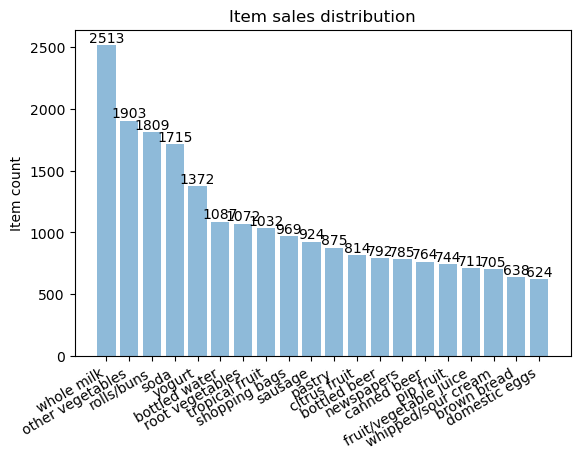

In [26]:
objects = (list(item_summary['item_name'].head(n=20)))
y_pos = np.arange(len(objects))
performance = list(item_summary['item_count'].head(n=20))

fig, ax = plt.subplots()
bars = ax.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('Item count')
plt.title('Item sales distribution')

ax.bar_label(bars, fontsize=10)

fig.autofmt_xdate()

plt.show()


### Unpopular items 

In [29]:
total_item_count = sum(grocery.sum())
print("Total Item : ", total_item_count)
print()
less_popular = grocery.sum().sort_values(ascending = True).reset_index()
less_popular.rename(columns={less_popular.columns[0]:'item_name',less_popular.columns[1]:'item_count'}, inplace=True)
print("Item Summary:")
print(less_popular.head(20))

Total Item :  43367

Item Summary:
                item_name  item_count
0    sound storage medium           1
1               baby food           1
2   preservation products           2
3                    bags           4
4         kitchen utensil           4
5          baby cosmetics           6
6          frozen chicken           6
7          toilet cleaner           7
8          salad dressing           8
9                  whisky           8
10        make up remover           8
11                liqueur           9
12        rubbing alcohol          10
13             hair spray          11
14          frozen fruits          12
15                  cream          13
16                  honey          15
17            decalcifier          15
18       organic products          16
19   specialty vegetables          17


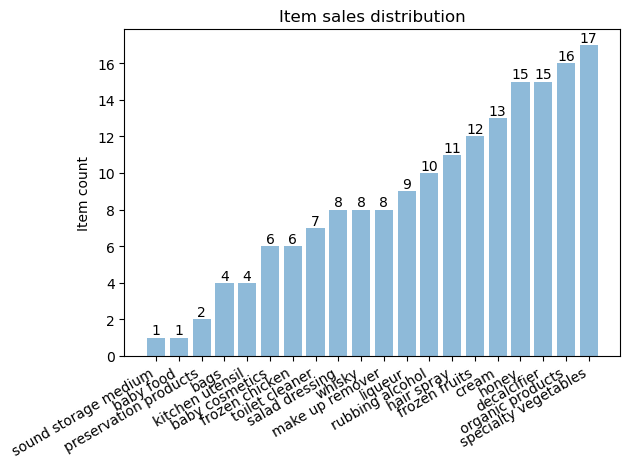

In [31]:
objects = (list(less_popular['item_name'].head(n=20)))
y_pos = np.arange(len(objects))
performance = list(less_popular['item_count'].head(n=20))

fig, ax = plt.subplots()
bars = ax.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('Item count')
plt.title('Item sales distribution')

ax.bar_label(bars, fontsize=10)

fig.autofmt_xdate()

plt.show()

### Apriori Algorithm, Generating frequent itemsets 

Frequent Itemsets: Item-sets whose support is greater or equal than minimum support threshold (min_sup). 

I have used the default parameter of the Apriori algorithm for min_support which is equal to 0.5 and I have gotten the following results: 

The min_support will vary and be chosen according to business needs and goals. 

In [34]:
frequent_itemsets = apriori(grocery, min_support=0.01, use_colnames=True)

frequent_itemsets.head(10)

C:\Users\Lenovo\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.079817,(newspapers)
1,0.033859,(sugar)
2,0.048094,(frozen vegetables)
3,0.010371,(flower (seeds))
4,0.110524,(bottled water)
5,0.010778,(salt)
6,0.037824,(salty snack)
7,0.174377,(soda)
8,0.013218,(cake bar)
9,0.042095,(white bread)


In [36]:
print("Number of frequent_itemsets: {}".format(frequent_itemsets.shape[0]))

Number of frequent_itemsets: 333


##### The dataframe below show us in the extra column the size of the item set (in other words, how many items are in the set): 

In [41]:
frequent_itemsets['length'] = \
(frequent_itemsets['itemsets'].apply(lambda x: len(x)))
frequent_itemsets.head()

,support,itemsets,length
0,0.079817,(newspapers),1
1,0.033859,(sugar),1
2,0.048094,(frozen vegetables),1
3,0.010371,(flower (seeds)),1
4,0.110524,(bottled water),1


#### In this dataframe contains all the itemsets with a lenght of 2 and with support in a specific range : [0.02, 0.021]

We can specify a range instead come up with a specific value when defining Support, because we can choose a spefic value that may not have any item-sets. 

In [44]:
lenght2 = frequent_itemsets[(frequent_itemsets['length'] == 2) \
                         & (frequent_itemsets\
                            ['support'] >= 0.02) \
                         & (frequent_itemsets\
                            ['support'] < 0.021)]

lenght2

,support,itemsets,length
101,0.020437,"(whole milk, frozen vegetables)",2
127,0.020844,"(tropical fruit, soda)",2
158,0.020437,"(bottled beer, whole milk)",2
167,0.020946,"(pastry, rolls/buns)",2
218,0.020031,"(butter, other vegetables)",2
237,0.020437,"(tropical fruit, pip fruit)",2
255,0.020742,"(yogurt, whipped/sour cream)",2
264,0.020539,"(frankfurter, whole milk)",2


#### Plot the Support values

We can see that there are not support values less than 0.01 which was the min_support value parameter set up above. 

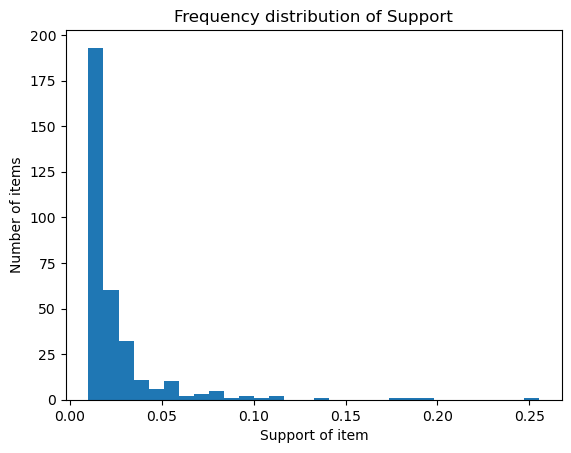

In [49]:
frequent_itemsets.hist("support", grid=False, bins=30)
plt.xlabel("Support of item")
plt.ylabel("Number of items")
plt.title("Frequency distribution of Support")
plt.show()

### Generating rules 

If a rule A=>B[Support, Confidence] satisfies min_sup and min_confidence then it is a strong rule. 

In [52]:
tati_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)

In [54]:
tati_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(newspapers),(whole milk),0.079817,0.255516,0.027351,0.342675,1.341110,1.0,0.006957,1.132597,0.276412,0.088808,0.117073,0.224859
1,(sugar),(other vegetables),0.033859,0.193493,0.010778,0.318318,1.645119,1.0,0.004226,1.183114,0.405884,0.049765,0.154773,0.187010
2,(sugar),(whole milk),0.033859,0.255516,0.015048,0.444444,1.739400,1.0,0.006397,1.340071,0.439986,0.054855,0.253771,0.251669
3,(frozen vegetables),(other vegetables),0.048094,0.193493,0.017794,0.369979,1.912108,1.0,0.008488,1.280127,0.501118,0.079509,0.218828,0.230969
4,(frozen vegetables),(whole milk),0.048094,0.255516,0.020437,0.424947,1.663094,1.0,0.008149,1.294636,0.418855,0.072172,0.227582,0.252466


In [56]:
print("Number of Associations: {}".format(tati_rules.shape[0]))

Number of Associations: 125


In [58]:
tati_rules2 = association_rules(frequent_itemsets, metric="lift", min_threshold=2)

In [60]:
tati_rules2.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(root vegetables),(frozen vegetables),0.108998,0.048094,0.011591,0.106343,2.211176,1.0,0.006349,1.065181,0.614760,0.079665,0.061193,0.173679
1,(frozen vegetables),(root vegetables),0.048094,0.108998,0.011591,0.241015,2.211176,1.0,0.006349,1.173938,0.575426,0.079665,0.148166,0.173679
2,(other vegetables),(onions),0.193493,0.031012,0.014235,0.073568,2.372268,1.0,0.008234,1.045936,0.717244,0.067698,0.043918,0.266292
3,(onions),(other vegetables),0.031012,0.193493,0.014235,0.459016,2.372268,1.0,0.008234,1.490817,0.596976,0.067698,0.329227,0.266292
4,(chicken),(other vegetables),0.042908,0.193493,0.017895,0.417062,2.155439,1.0,0.009593,1.383521,0.560090,0.081899,0.277206,0.254774


In [62]:
print("Number of Associations: {}".format(tati_rules2.shape[0]))

Number of Associations: 160


The number of association rules found using the lift metric with the minimum threshold value of 0.2 is 618, which is a higher value when compared to the confidence metric which has a number of association rules of 234. 

In [68]:
tati_rules[(tati_rules['lift'] >= 2) & (tati_rules['confidence'] >=0.5)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
81,"(rolls/buns, root vegetables)",(other vegetables),0.024301,0.193493,0.012201,0.502092,2.594890,1.0,0.007499,1.619792,0.629935,0.059347,0.382637,0.282575
84,"(rolls/buns, root vegetables)",(whole milk),0.024301,0.255516,0.012710,0.523013,2.046888,1.0,0.006500,1.560804,0.524192,0.047583,0.359305,0.286377
90,"(tropical fruit, root vegetables)",(other vegetables),0.021047,0.193493,0.012303,0.584541,3.020999,1.0,0.008231,1.941244,0.683367,0.060835,0.484867,0.324062
95,"(yogurt, other vegetables)",(whole milk),0.043416,0.255516,0.022267,0.512881,2.007235,1.0,0.011174,1.528340,0.524577,0.080485,0.345695,0.300014
97,"(yogurt, root vegetables)",(other vegetables),0.025826,0.193493,0.012913,0.500000,2.584078,1.0,0.007916,1.613015,0.629266,0.062562,0.380043,0.283368
101,"(citrus fruit, root vegetables)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,1.0,0.006948,1.949059,0.681990,0.051646,0.486932,0.319903
102,"(butter, other vegetables)",(whole milk),0.020031,0.255516,0.011490,0.573604,2.244885,1.0,0.006371,1.745992,0.565878,0.043512,0.427260,0.309285
106,"(other vegetables, domestic eggs)",(whole milk),0.022267,0.255516,0.012303,0.552511,2.162336,1.0,0.006613,1.663694,0.549779,0.046342,0.398928,0.300331
109,"(other vegetables, pip fruit)",(whole milk),0.026131,0.255516,0.013523,0.517510,2.025351,1.0,0.006846,1.543003,0.519843,0.050436,0.351913,0.285217
115,"(tropical fruit, yogurt)",(whole milk),0.029283,0.255516,0.015150,0.517361,2.024770,1.0,0.007668,1.542528,0.521384,0.056184,0.351714,0.288326


In [74]:
print(grocery['whole milk'].sum())
print(grocery[['pip fruit', 'other vegetables']].sum())

2513
pip fruit            744
other vegetables    1903
dtype: int64


### A=>B[Support,Confidence]

The part before $=>$all is referred to as if (Antecedent) and the part after $=>$ is referred to as then (Consequent).

Where A and B are sets of items in the transaction data. A and B are disjoint sets.

Example: whole milk => yougurt [Support=20\%, confidence=60\%]


20% transaction show yogurt is bought with purchase of a whole milk

60% of customers who purchase yogurt is bought with purchase of whole milk

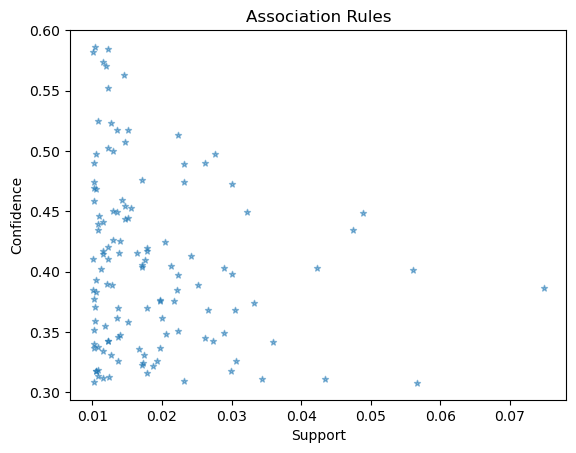

In [77]:
tati_rules.plot.scatter("support", "confidence", \
                   alpha=0.5, marker="*")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Association Rules")
plt.show()

Notice that there are no association rules with both extremely high confidence and extremely high support.

If an item set has high support, the items are likely to appear with many other items, making the chances of high confidence very low. (Johnston et al.)

### Plot Confidence distribution 

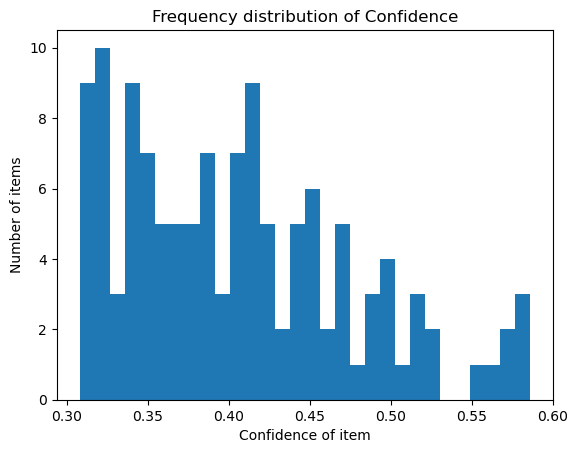

In [81]:
tati_rules.hist("confidence", grid=False, bins=30)
plt.xlabel("Confidence of item")
plt.ylabel("Number of items")
plt.title("Frequency distribution of Confidence")
plt.show()

### Lift and average

Is there a link between two items or not ? 
What kind of link, correlation is that? 

### Lift
The values of the metrics measure the degree and orientation (in other words, positive or negative) of the relationship between the items. 

A value of lift other than 1 means that some dependency exists between the items. When the value is greater than 1, the second item is more likely to be purchased if the first item is purchased. Likewise, when the value is less than 1, the second item is less likely to be purchased if the first item is purchased. 

If the lift value is 0.1, we could say that the relationship between the two items is strong in the negative direction. 

A lift of 1 indicates that the products are independent of one another.

A positive leverage (greater than 0) suggests that the items tend to occur together more frequently than expected, indicating a positive association. On the other hand, a negative leverage (less than 0) suggests that the items tend to occur together less frequently than expected, indicating a negative association or avoidance.

# Average
The results ranges from -1 to 1. It calculates the difference between the two cases. 

When average is = 0, (It's equal to lift = 1), that means the two items are independent, therefore there are no correlation between item A and B when they are purchased together. 

### Plot lift Distribution 
We can see that there are less data points after 2.5 value.

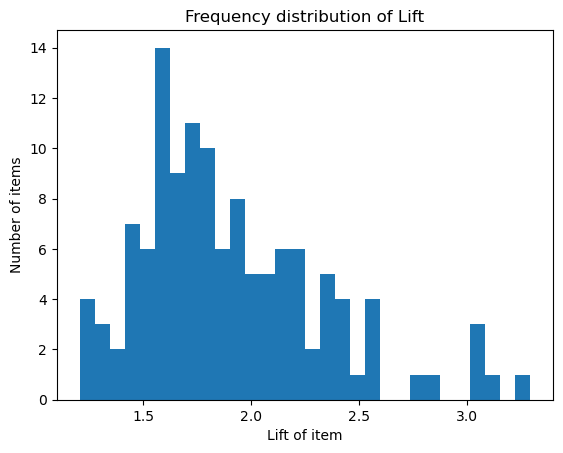

In [85]:
tati_rules.hist("lift", grid=False, bins=30)
plt.xlabel("Lift of item")
plt.ylabel("Number of items")
plt.title("Frequency distribution of Lift")



plt.show()

### Plot Leverage distribution

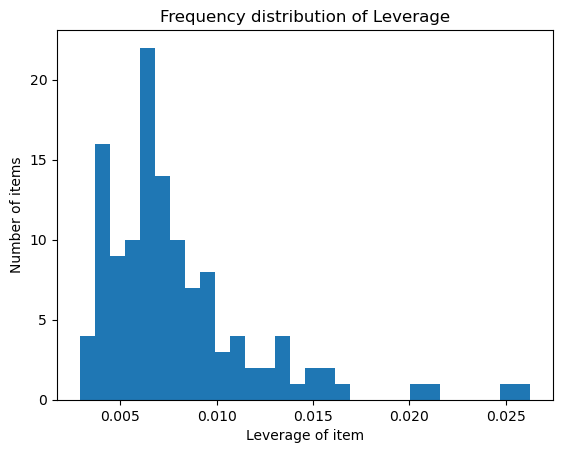

In [89]:
tati_rules.hist("leverage", grid=False, bins=30)
plt.xlabel("Leverage of item")
plt.ylabel("Number of items")
plt.title("Frequency distribution of Leverage")
plt.show()

In [91]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import time

# Start timing
start_time = time.time()

# Calculate the frequent itemsets by calling the apriori method
frequent_itemsets_ap = apriori(grocery, min_support=0.01, use_colnames=True)

# Calculate association rules
rules_ap = association_rules(frequent_itemsets_ap, metric="confidence", min_threshold=0.8)

# End timing
end_time = time.time()

# Calculate the time taken
calculation_time = end_time - start_time

print("Association rules calculated in {:.2f} seconds.".format(calculation_time))

C:\Users\Lenovo\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Association rules calculated in 5.22 seconds.


### FP Growth Algorithm 

The FP-Growth (Frequent Pattern Growth) algorithm is another popular algorithm for association rule mining. It works by constructing a tree-like structure called a FP-tree, which encodes the frequent itemsets in the dataset. The FP-tree is then used to generate association rules in a similar manner to the Apriori algorithm. The FP-Growth algorithm is generally faster than the Apriori algorithm, especially for large datasets. (Ali)

In [94]:
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

In [96]:
# Evaluate the frequent item rules for fpgrowth function
frequent_items2 = fpgrowth(grocery, min_support = 0.01, use_colnames = True)

print(frequent_items2)

C:\Users\Lenovo\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


      support                         itemsets
0    0.082766                   (citrus fruit)
1    0.058566                      (margarine)
2    0.017692            (semi-finished bread)
3    0.139502                         (yogurt)
4    0.104931                 (tropical fruit)
..        ...                              ...
328  0.010168  (rolls/buns, frozen vegetables)
329  0.012405      (yogurt, frozen vegetables)
330  0.014235       (other vegetables, onions)
331  0.012100             (whole milk, onions)
332  0.010778      (whole milk, sliced cheese)

[333 rows x 2 columns]


In [98]:
print("Number of frequent_items2: {}".format(frequent_items2.shape[0]))

Number of frequent_items2: 333


In [100]:
# Display the reles due to fp-growth algorithm
rules_fp1 = association_rules(frequent_items2, metric = "confidence", min_threshold = 0.3)

rules_fp1.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(citrus fruit),(whole milk),0.082766,0.255516,0.030503,0.368550,1.442377,1.0,0.009355,1.179008,0.334375,0.099108,0.151829,0.243965
1,(citrus fruit),(other vegetables),0.082766,0.193493,0.028876,0.348894,1.803140,1.0,0.012862,1.238674,0.485603,0.116728,0.192685,0.249066
2,"(citrus fruit, whole milk)",(yogurt),0.030503,0.139502,0.010269,0.336667,2.413350,1.0,0.006014,1.297233,0.604064,0.064290,0.229129,0.205141
3,"(yogurt, citrus fruit)",(whole milk),0.021657,0.255516,0.010269,0.474178,1.855768,1.0,0.004736,1.415849,0.471348,0.038476,0.293710,0.257185
4,"(citrus fruit, other vegetables)",(whole milk),0.028876,0.255516,0.013015,0.450704,1.763898,1.0,0.005636,1.355343,0.445951,0.047958,0.262179,0.250820


In [102]:
print("Number of Associations: {}".format(rules_fp1.shape[0]))

Number of Associations: 125


In [104]:
print(grocery['whole milk'].sum())
print(grocery['citrus fruit'].sum())
print(grocery['other vegetables'].sum())

2513
814
1903


In [106]:
# Display the reles due to fp-growth algorithm
rules_fp2 = association_rules(frequent_items2, metric = "lift", min_threshold = 2)

rules_fp2.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(tropical fruit),(citrus fruit),0.104931,0.082766,0.019929,0.189922,2.294702,1.0,0.011244,1.132280,0.630358,0.118788,0.116826,0.215354
1,(citrus fruit),(tropical fruit),0.082766,0.104931,0.019929,0.240786,2.294702,1.0,0.011244,1.178942,0.615125,0.118788,0.151782,0.215354
2,"(yogurt, whole milk)",(citrus fruit),0.056024,0.082766,0.010269,0.183303,2.214725,1.0,0.005633,1.123103,0.581028,0.079905,0.109609,0.153691
3,"(citrus fruit, whole milk)",(yogurt),0.030503,0.139502,0.010269,0.336667,2.413350,1.0,0.006014,1.297233,0.604064,0.064290,0.229129,0.205141
4,(yogurt),"(citrus fruit, whole milk)",0.139502,0.030503,0.010269,0.073615,2.413350,1.0,0.006014,1.046538,0.680580,0.064290,0.044468,0.205141


In [108]:
print("Number of Associations: {}".format(rules_fp2.shape[0]))

Number of Associations: 160


In [110]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import time

# Start timing
start_time = time.time()

# Calculate the frequent itemsets by calling the apriori method
frequent_itemsets_ap = fpgrowth(grocery, min_support=0.01, use_colnames=True)

# Calculate association rules
rules_ap = association_rules(frequent_itemsets_ap, metric="confidence", min_threshold=0.8)

# End timing
end_time = time.time()

# Calculate the time taken
calculation_time = end_time - start_time

print("Association rules calculated in {:.2f} seconds.".format(calculation_time))

C:\Users\Lenovo\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Association rules calculated in 12.61 seconds.
